1.0


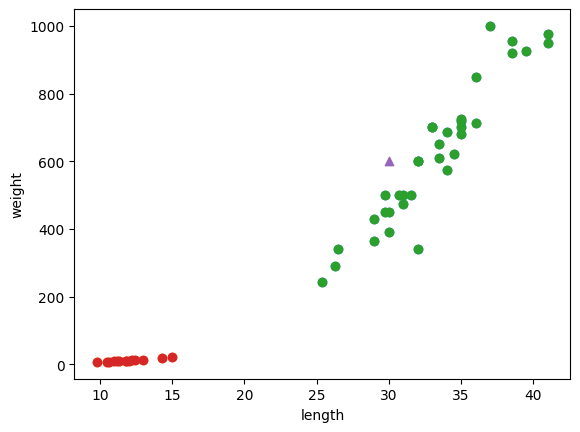

[1]


0.7142857142857143

In [2]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# 도미
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

# 빙어
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

#빙어 + 도미
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.xlabel('length')
plt.ylabel('weight')
# plt.show()

#빙어 도미 데이터를 합쳐서 fish_data라는 2차원 리스트 생성
length = bream_length + smelt_length
weight = bream_weight + smelt_length
fish_data = [[l, w] for l, w in zip(length, weight)]

#정답 데이터 = 목표 변수 생성 / 도미와 빙어 순서대로 나열했기 때문에 가능
fish_target = [1] * 35 + [0] * 14
fish_target

#객체 생성 -> 클레스의 객체 생성
kn = KNeighborsClassifier()
kn.fit(fish_data, fish_target) #fit() -> 주어진 데이터로 알고리즘 학습
kn_score = kn.score(fish_data, fish_target) # 사이킷런에서 모델 평가하는 매서드 = score()
print(kn_score)

#k-최근접 이웃 알고리즘
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.scatter(30, 600, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

print(kn.predict([[30, 600]])) #길이 30, 무게 600 어떤 생선?

kn49 = KNeighborsClassifier(n_neighbors=49) #참고 데이터를 49개로 한 kn49 모델 -> 기본 값 = 5
kn49.fit(fish_data, fish_target)
kn49.score(fish_data, fish_target) #35/49 => 0.714285...

k-최근접 이웃 알고리즘
KNeighborsClassifier
> - 예측하려는 샘플에 가장 가까운 샘플 k개를 선택 -> 샘플들의 클래스를 확인해 다수 클래스를 새로운 샘플의 클래스로 예측한다.

> - 가장 가까운 직선거리에 어떤 데이터가 있는지를 살피기만 하면 된다.
> - 데이터가 많으면 메모리가 많이 필요하고 직선거리를 계산하는 데도 많은 시간이 들어 사용이 어렵다.

> - n_neighbors를 매개변수로 이웃의 개수를 정한다.
> - - 기본값은 5

> - p 매개변수로 거리를 재는 방법을 정한다.
> - - 1 = 맨해튼 거리, 2 = 유클리디안 거리, 기본값 = 2

> - n_jobs 매개변수를 이용해 cpu 코어를 지정할 수 있다. -> 이웃간의 거리 계산 속도를 높일 수 있지만 fit() 메서드에는 영향이 없다.
> - - -1 = 모든 cpu 코어 사용, 기본 값 = 1